In [1]:
import os 
import glob 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

c:\Users\kim_h\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = './data/data_noNull.csv'

In [3]:
data = pd.read_csv(path)

data.head()

,date,sample_time_continuous_caster,steel_type,doc_requirement,"workpiece_weight, tonn",workpiece_slice_geometry_150x150,cast_in_row,alloy_type_open,"alloy_speed, meter/minute","steel_weight_theoretical, tonn",...,"Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,"quantity, tonn",num_crystallizer,num_stream,RUL
0,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30013346,0.01,2,1,814.0
1,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30013350,0.01,5,2,0.0
2,2020-01-05,2020-01-05 00:20:12,St3sp,Contract,163.8,1,18,1,3,164.2,...,0.0007,0.0037,0.0,0.0,0.0,30012261,0.01,22,4,0.0
3,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,1,6,1,3,162.1,...,0.0011,0.0056,0.0,0.0,0.0,30013346,0.03,2,1,1148.0
4,2020-01-05,2020-01-05 14:59:52,St3sp,Contract,161.7,1,6,1,3,162.1,...,0.0011,0.0056,0.0,0.0,0.0,30013350,0.03,5,2,341.0


In [4]:
df_Arm500 = data[data['steel_type']=="Arm500"]
df_St4sp = data[data['steel_type']=="St4sp"]
df_St3sp = data[data['steel_type']=="St3sp"]
df_1015 = data[data['steel_type']=="1015"]
df_25G2S = data[data['steel_type']=="1015"]
df_1018 = data[data['steel_type']=="1018"]
df_1010 = data[data['steel_type']=="1010"]

df_Arm240 = data[data['steel_type']=="Arm240"]
df_YP = data[data['steel_type']=="YP"]
df_1008 = data[data['steel_type']=="1008"]
df_V500V = data[data['steel_type']=="V500V"]
df_20 = data[data['steel_type']=="20"]

In [5]:
df_Arm500 = df_Arm500.drop(labels=['date', 'sample_time_continuous_caster', 'steel_type', 'doc_requirement'],axis=1)

In [14]:
high_RUL = df_Arm500[df_Arm500['RUL']>10000]
nomal_RUL = df_Arm500[df_Arm500['RUL']<10000]

print(len(high_RUL))
print(len(nomal_RUL))
print(high_RUL['RUL'].mean())
print(nomal_RUL['RUL'].mean())
# high_RUL 평균은 nomal_RUL 평균의 200배 이상

1210
6706
937424.0363636364
4608.048464062034


In [22]:
high_RUL['RUL'] = 1
nomal_RUL['RUL'] = 0

In [23]:
new_data_Arm500 = pd.concat([high_RUL,nomal_RUL])

new_data_Arm500.head()

,"workpiece_weight, tonn",workpiece_slice_geometry_150x150,cast_in_row,alloy_type_open,"alloy_speed, meter/minute","steel_weight_theoretical, tonn","steel_weight, tonn",grab1_num,"steel_temperature_grab1, Celsius deg.","metal_residue_grab1, tonn",...,"Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,"quantity, tonn",num_crystallizer,num_stream,RUL
40,166.98,0,10,1,2,167.38,166.98,12.0,1568.0,0.4,...,0.0007,0.0057,0.0,0.0,0.0,30013866,0.06,17,5,1
44,166.98,0,10,1,2,167.38,166.98,12.0,1568.0,0.4,...,0.0007,0.0057,0.0,0.0,0.0,30013870,0.06,18,6,1
46,166.98,0,10,1,2,167.38,166.98,12.0,1568.0,0.4,...,0.0007,0.0057,0.0,0.0,0.0,30013863,0.06,13,3,1
49,151.80,0,11,1,2,152.20,151.80,9.0,1570.0,0.4,...,0.0007,0.0067,0.0,0.0,0.0,30013866,0.01,17,5,1
52,151.80,0,11,1,2,152.20,151.80,9.0,1570.0,0.4,...,0.0007,0.0067,0.0,0.0,0.0,30013863,0.01,13,3,1


In [24]:
new_data_Arm500['RUL'].value_counts()

RUL
0    6706
1    1210
Name: count, dtype: int64

## 모델링

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


In [26]:
X = new_data_Arm500.drop(['RUL'], axis=1)
y = new_data_Arm500['RUL']

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2023, shuffle =True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=2023, shuffle =True)

In [28]:
class Pipeline:
    def __init__(self, scalar):
        self.scalar = scalar
    
    def fit(self, X, y):
        X = self.scalar.fit_transform(X)
        return X, y
    
    def transform(self, X, y):
        X = self.scalar.transform(X)
        return X, y

In [29]:
scaler = RobustScaler()
pipeline = Pipeline(scaler)

### 정규화

In [30]:
X_train_s, y_train_s = pipeline.fit(X_train, y_train)
X_val_s, y_val_s = pipeline.transform(X_val, y_val)

X_test_s, y_test_s = pipeline.transform(X_test, y_test)

### 모델 선정을 위한 실험

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

models = {
    "KNeighborsClassifier": {"model":KNeighborsClassifier(n_neighbors=5)},
    "DecisionTreeClassifier": {"model":DecisionTreeClassifier()},
    "LogisticRegression": {"model":LogisticRegression()},
    "RandomForestClassifier": {"model":RandomForestClassifier()},
    "XGBClassifier": {"model":XGBClassifier()},
    "LGBMClassifier": {"model":LGBMClassifier(verbose=-1)}
}

In [32]:
from time import perf_counter

# Train모델 학습
for name, model in models.items():
    model = model['model']
    start = perf_counter()
    
    history = model.fit(X_train_s, y_train_s)
    
    # 학습시간과 val_accuracy 저장
    duration = perf_counter() - start
    duration = round(duration,2)
    models[name]['perf'] = duration
    
    y_train_pred = model.predict(X_train_s)
    y_val_pred = model.predict(X_val_s)
    
    train_score = round(model.score(X_train_s, y_train_s),4)
    val_score = round(model.score(X_val_s, y_val_s),4)
    
    models[name]['train_score'] = train_score
    models[name]['val_score'] = val_score
    
    print(f"{name:20} trained in {duration} sec, train_score: {train_score}. val_score: {val_score}")
    
# Create a DataFrame with the results
models_result = []

for name, v in models.items():
    models_result.append([ name, models[name]['val_score'], 
                          models[name]['perf']])
    
df_results = pd.DataFrame(models_result, 
                          columns = ['model','val_score','Training time (sec)'])
df_results.sort_values(by='val_score', ascending=False, inplace=True)
df_results.reset_index(inplace=True,drop=True)
df_results

KNeighborsClassifier trained in 0.0 sec, train_score: 0.8989. val_score: 0.8647
DecisionTreeClassifier trained in 0.05 sec, train_score: 1.0. val_score: 0.9837
LogisticRegression   trained in 0.04 sec, train_score: 0.847. val_score: 0.8453
RandomForestClassifier trained in 1.26 sec, train_score: 1.0. val_score: 0.9658
XGBClassifier        trained in 0.13 sec, train_score: 1.0. val_score: 0.9958
LGBMClassifier       trained in 0.11 sec, train_score: 1.0. val_score: 0.9958


,model,val_score,Training time (sec)
0,XGBClassifier,0.9958,0.13
1,LGBMClassifier,0.9958,0.11
2,DecisionTreeClassifier,0.9837,0.05
3,RandomForestClassifier,0.9658,1.26
4,KNeighborsClassifier,0.8647,0.00
5,LogisticRegression,0.8453,0.04


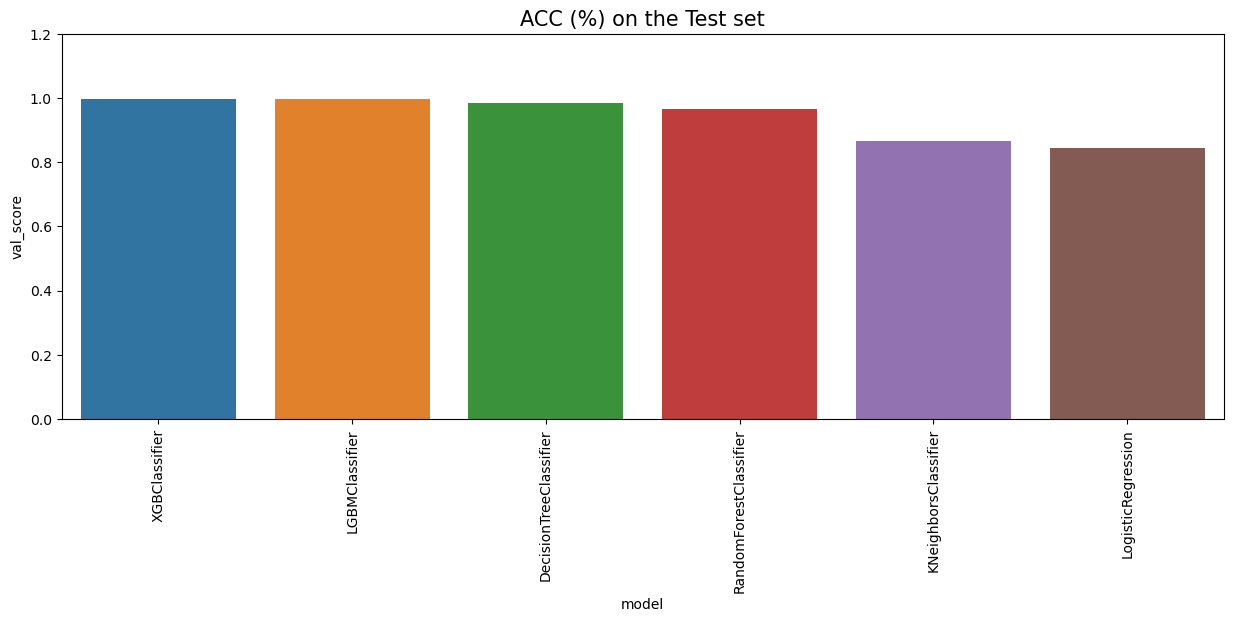

In [33]:
def check_performance_for_model(df_results):
    plt.figure(figsize = (15,5))
    sns.barplot(x = 'model', y = 'val_score', data = df_results)
    plt.title('ACC (%) on the Test set', fontsize = 15)
    plt.ylim(0,1.2)
    plt.xticks(rotation=90)
    plt.show()
    
check_performance_for_model(df_results)

### 예측

In [34]:


model = XGBClassifier()

model.fit(X_train_s, y_train_s)

y_test_pred = model.predict(X_test_s)
test_score = round(model.score(X_test_s, y_test_s),4)

print('acc:', test_score)
print(classification_report(y_test, y_test_pred))

acc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00        61

    accuracy                           1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475



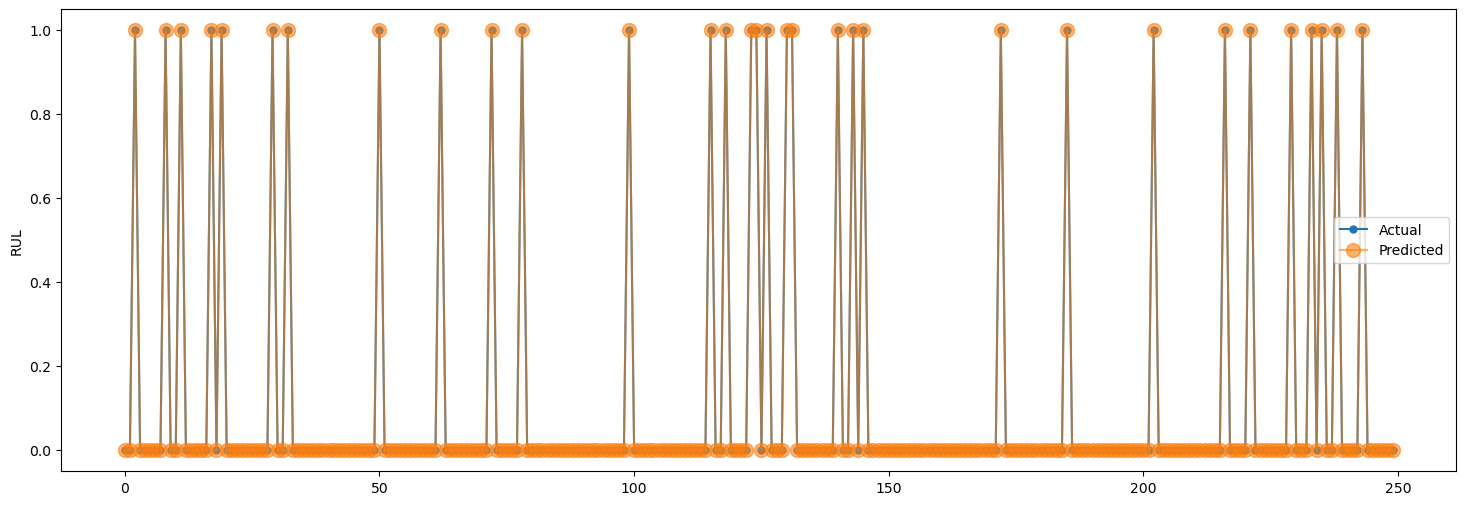

In [35]:
def eval_graph(y_valid, y_pred, cnt):
    plt.figure(figsize=(18,6))
    plt.plot(y_valid.values[:cnt], label='Actual',  marker = 'o', markersize=5)
    plt.plot(y_pred[:cnt], label='Predicted', alpha = 0.6,  marker = 'o', markersize=10)
    plt.legend()
    plt.ylabel('RUL')
    plt.show()

eval_graph(y_test_s, y_test_pred, 250)

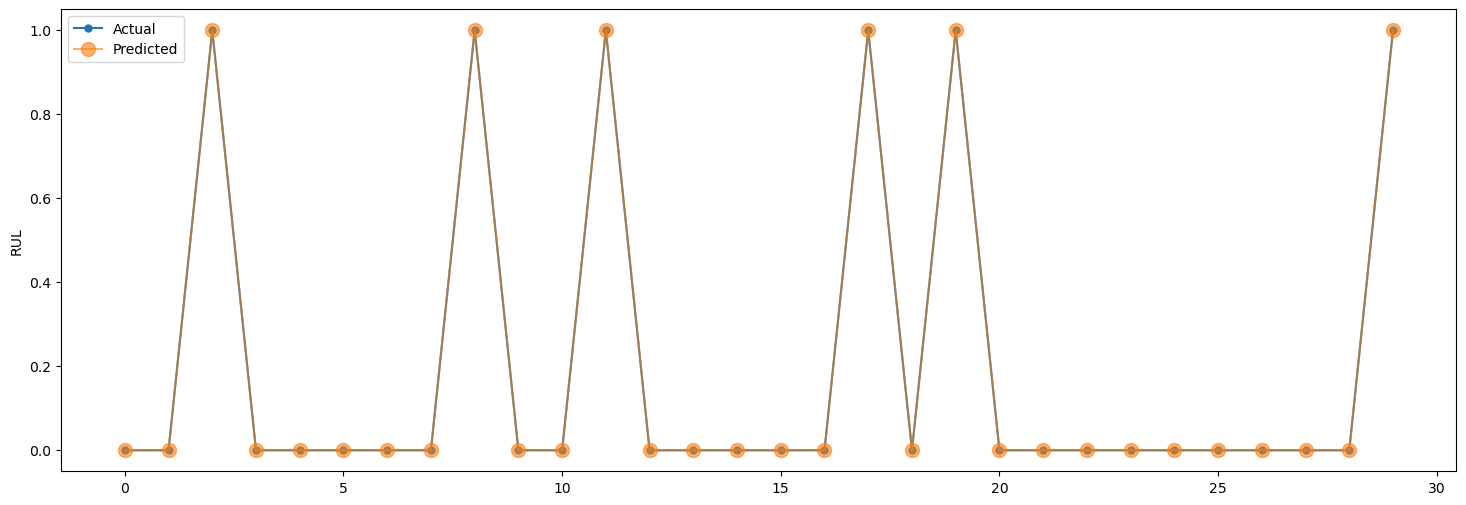

In [36]:
eval_graph(y_test_s, y_test_pred, 30)

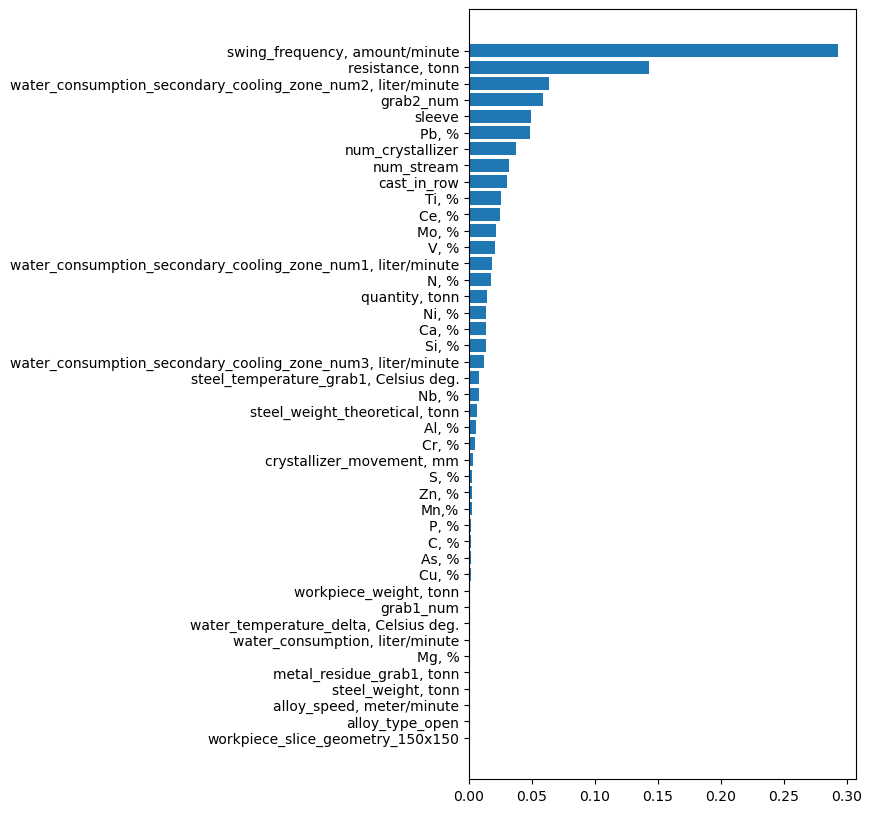

In [37]:
# 데이터프레임 만들기
perf_dic = {'feature':list(X),
            'importance': model.feature_importances_}
df = pd.DataFrame(perf_dic)
df.sort_values(by='importance', ascending=True, inplace=True)

# 시각화
plt.figure(figsize=(5, 10))
plt.barh(df['feature'], df['importance'])
plt.show()

### 분석결과 

높은 RUL을 갖고 말고는 

- 'swing_frequency, amount/minute'
- 'resistance, tonn'
- 'water_consumption_secondary_cooling_zone_num2, liter/minute'

등이 강하게 영향을 준다는것을 알수 있게 되었다.
